---
5 Clustering
---

Our topic today is an unsupervised ML method [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis), which does not require a supervisor to provide the label values for any datapoint. Clustering methods aim to decompose datapoints into a few subsets which we refer to as clusters. They learn according to our question (a *hypothesis*) for assigning each data point either to one cluster or several clusters with different degrees of belonging.

Broadly speaking, clustering can be divided into two subgroups:

- **Hard Clustering**: In hard clustering, each data point either belongs to a cluster completely or not. 
- **Soft Clustering**: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. 

Clustering of unlabeled data can be performed with the module [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster). Each clustering algorithm comes in two variants: a class ([python class](https://docs.python.org/3/tutorial/classes.html)), that implements the `fit.()` method to learn the clusters on training data, and a function, that, given training data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the `labels_` attribute. Here is the overview of [clustering methods](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods).

Here, we will use **K-means** to solve a **hard-clustering** task. 

## Learning goals
* Learn how to **construct** and **train** K-means for **hard-clustering** task using `scikit-learn`. 
* Learn the importance of K-means initialization.
* Learn about the properties of K-means clusters.
* Learn how to use inertia and silhouette coefficient to choose the number of clusters k.
* Learn how to construct new features using clustering, and to leverage those for more expressive (supervised) models.

The **[KMeans](https://en.wikipedia.org/wiki/K-means_clustering)** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of $N$ samples $X = \{x_1,x_2,...,x_n\}$ into $K$ disjoint clusters $C_1,C_2,...,C_k$, each described by the mean $\mu_j$ of the samples in the cluster $C_j$, for $j \in \{1,2,3,...,k\}$ . The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares criterion**:
$$
\mathop{min}\limits_{\mathbf{\mu}}
\sum^{k}_{j=1}
\sum^{}_{x_i\in C_j}
\| x_i - \mu_j\|^2
$$

Furthermore, since the total variance in the data is a constant, by minimizing the within-cluster (intra) variance we are also implicitly *maximizing* the between-cluster (inter) variance. As a result, K-means tries to find well separated spherical clusters with equal densities. More specifically, K-means can only produce convex clusters, which makes it less useful when the targeted/real clusters are strongly overlapping or entangled. And finally, whether or not there is actually any "clustering/grouping" we as humans might recognize or wish to find in the data, K-means **will** return us k cluster centroids, and those centroids will partition the input space in convex partitions using euclidean distance. It is solely on the analyst to interpret and validate the results using ingenuity and existing tools (goodness measures, visual inspection etc.).

# 5.1 Visualize Nigerian Music scraped from Spotify - an analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("../data/nigerian-songs.csv")
df.head()


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [3]:
# Get information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [4]:
# Double-check for null values.
df.isnull().sum()


name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [5]:
# Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value
df.describe()


,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


Text(0.5, 1.0, 'Top genres')

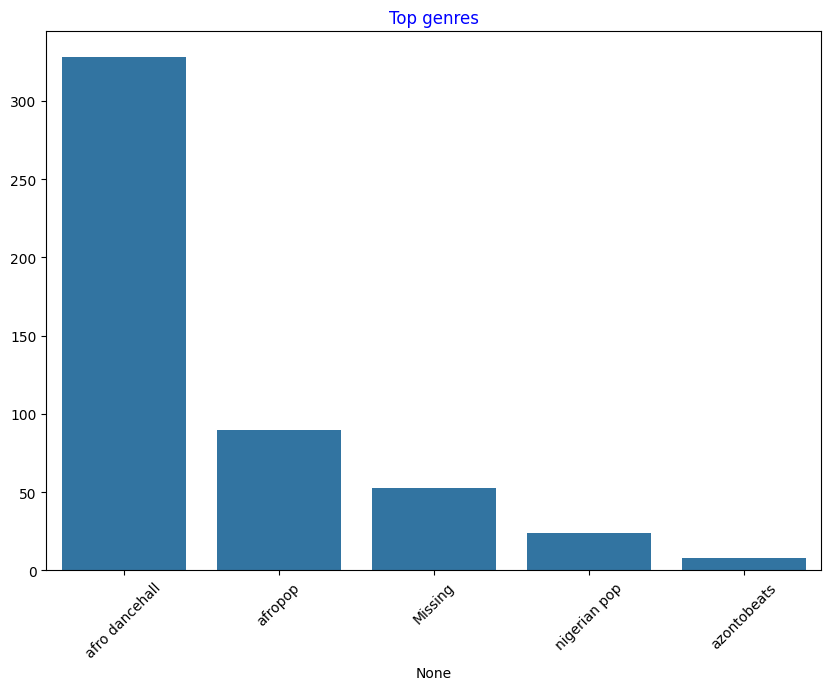

In [6]:
# Let's examine the genres. Quite a few are listed as 'Missing' which means they aren't categorized in the dataset with a genre 
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')


Text(0.5, 1.0, 'Top genres')

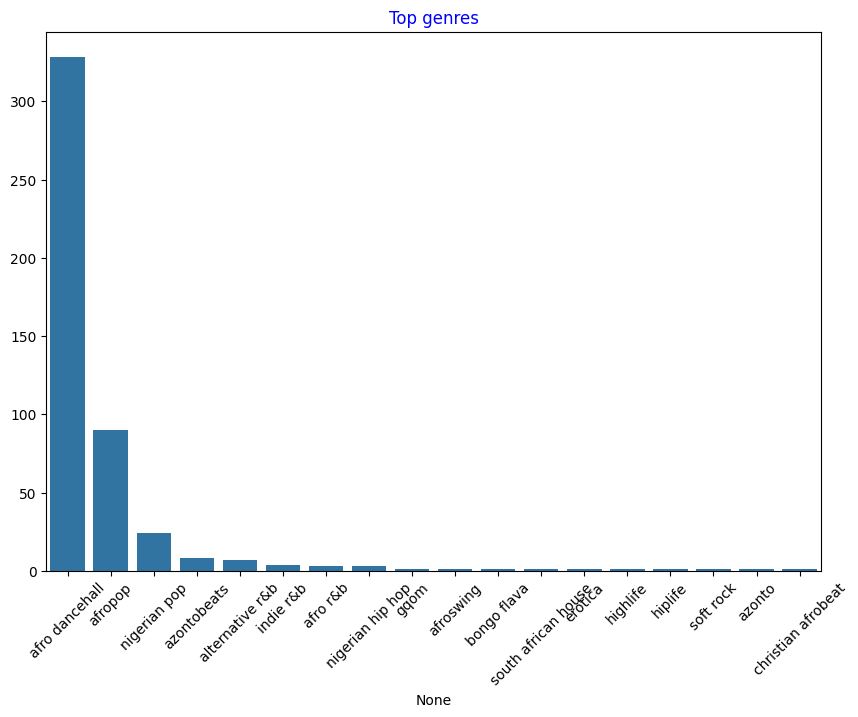

In [7]:
# Remove 'Missing' genres, as it's not classified in Spotify
df = df[df['artist_top_genre'] != 'Missing']
myDF = df.copy()
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')


Text(0.5, 1.0, 'Top genres')

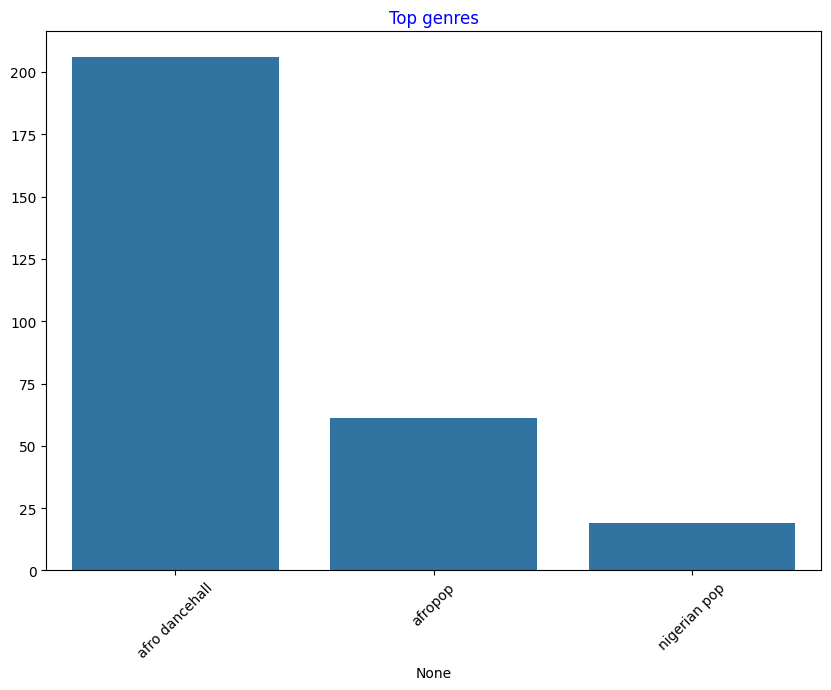

In [8]:
# The top three genres comprise the greatest part of the dataset, so let's focus on those
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

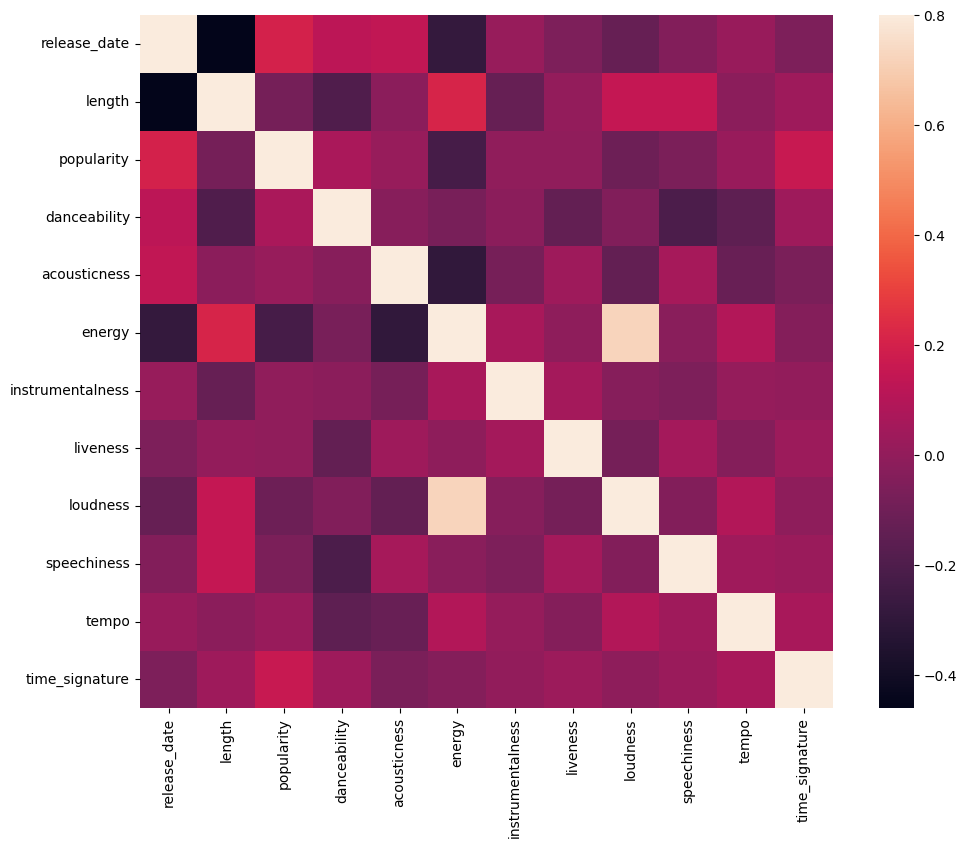

In [9]:
# The data is not strongly correlated except between energy and loudness, which makes sense. 
# Popularity has a correspondence to release data, which also makes sense, as more recent songs are probably more popular. 
# Length and energy seem to have a correlation - perhaps shorter songs are more energetic?
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

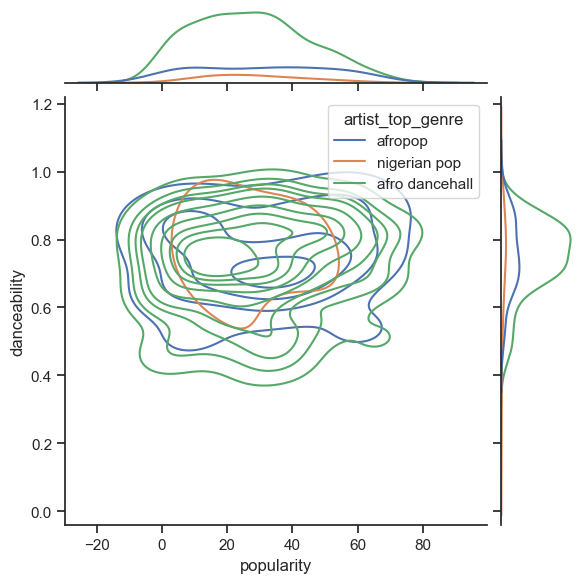

In [10]:
# Are the genres significantly different in the perception of their danceability, based on their popularity? 
# Examine our top three genres data distribution for popularity and danceability along a given x and y axis 
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

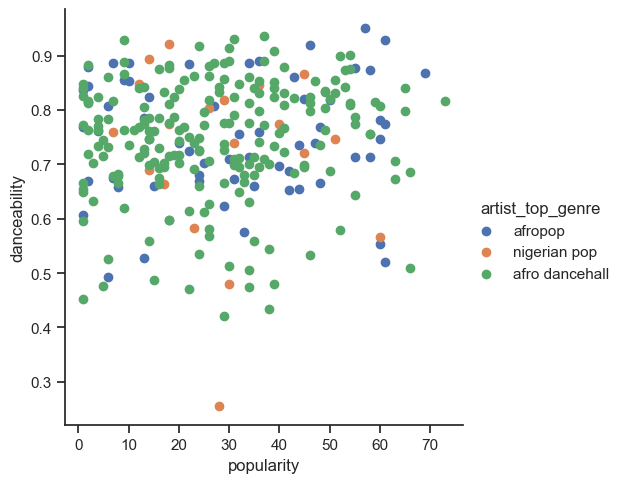

In [11]:
# In general, the three genres align in terms of their popularity and danceability.  
# A scatterplot of the same axes shows a similar pattern of convergence. 
# Try a scatterplot to check the distribution of data per genre
sns.FacetGrid(df, hue="artist_top_genre", height=5).map(plt.scatter, "popularity", "danceability").add_legend()

# 5.2 K-Means
We will focus only on 3 genres. Maybe we can get 3 clusters built. But how clean is our data? 

Check for outliers using box plots. We will concentrate on columns with fewer outliers (although you could clean out the outliers). Boxplots can show the range of the data and will help choose which columns to use. Note, Boxplots do not show variance, an important element of good clusterable data (https://stats.stackexchange.com/questions/91536/deduce-variance-from-boxplot)

<Axes: xlabel='release_date'>

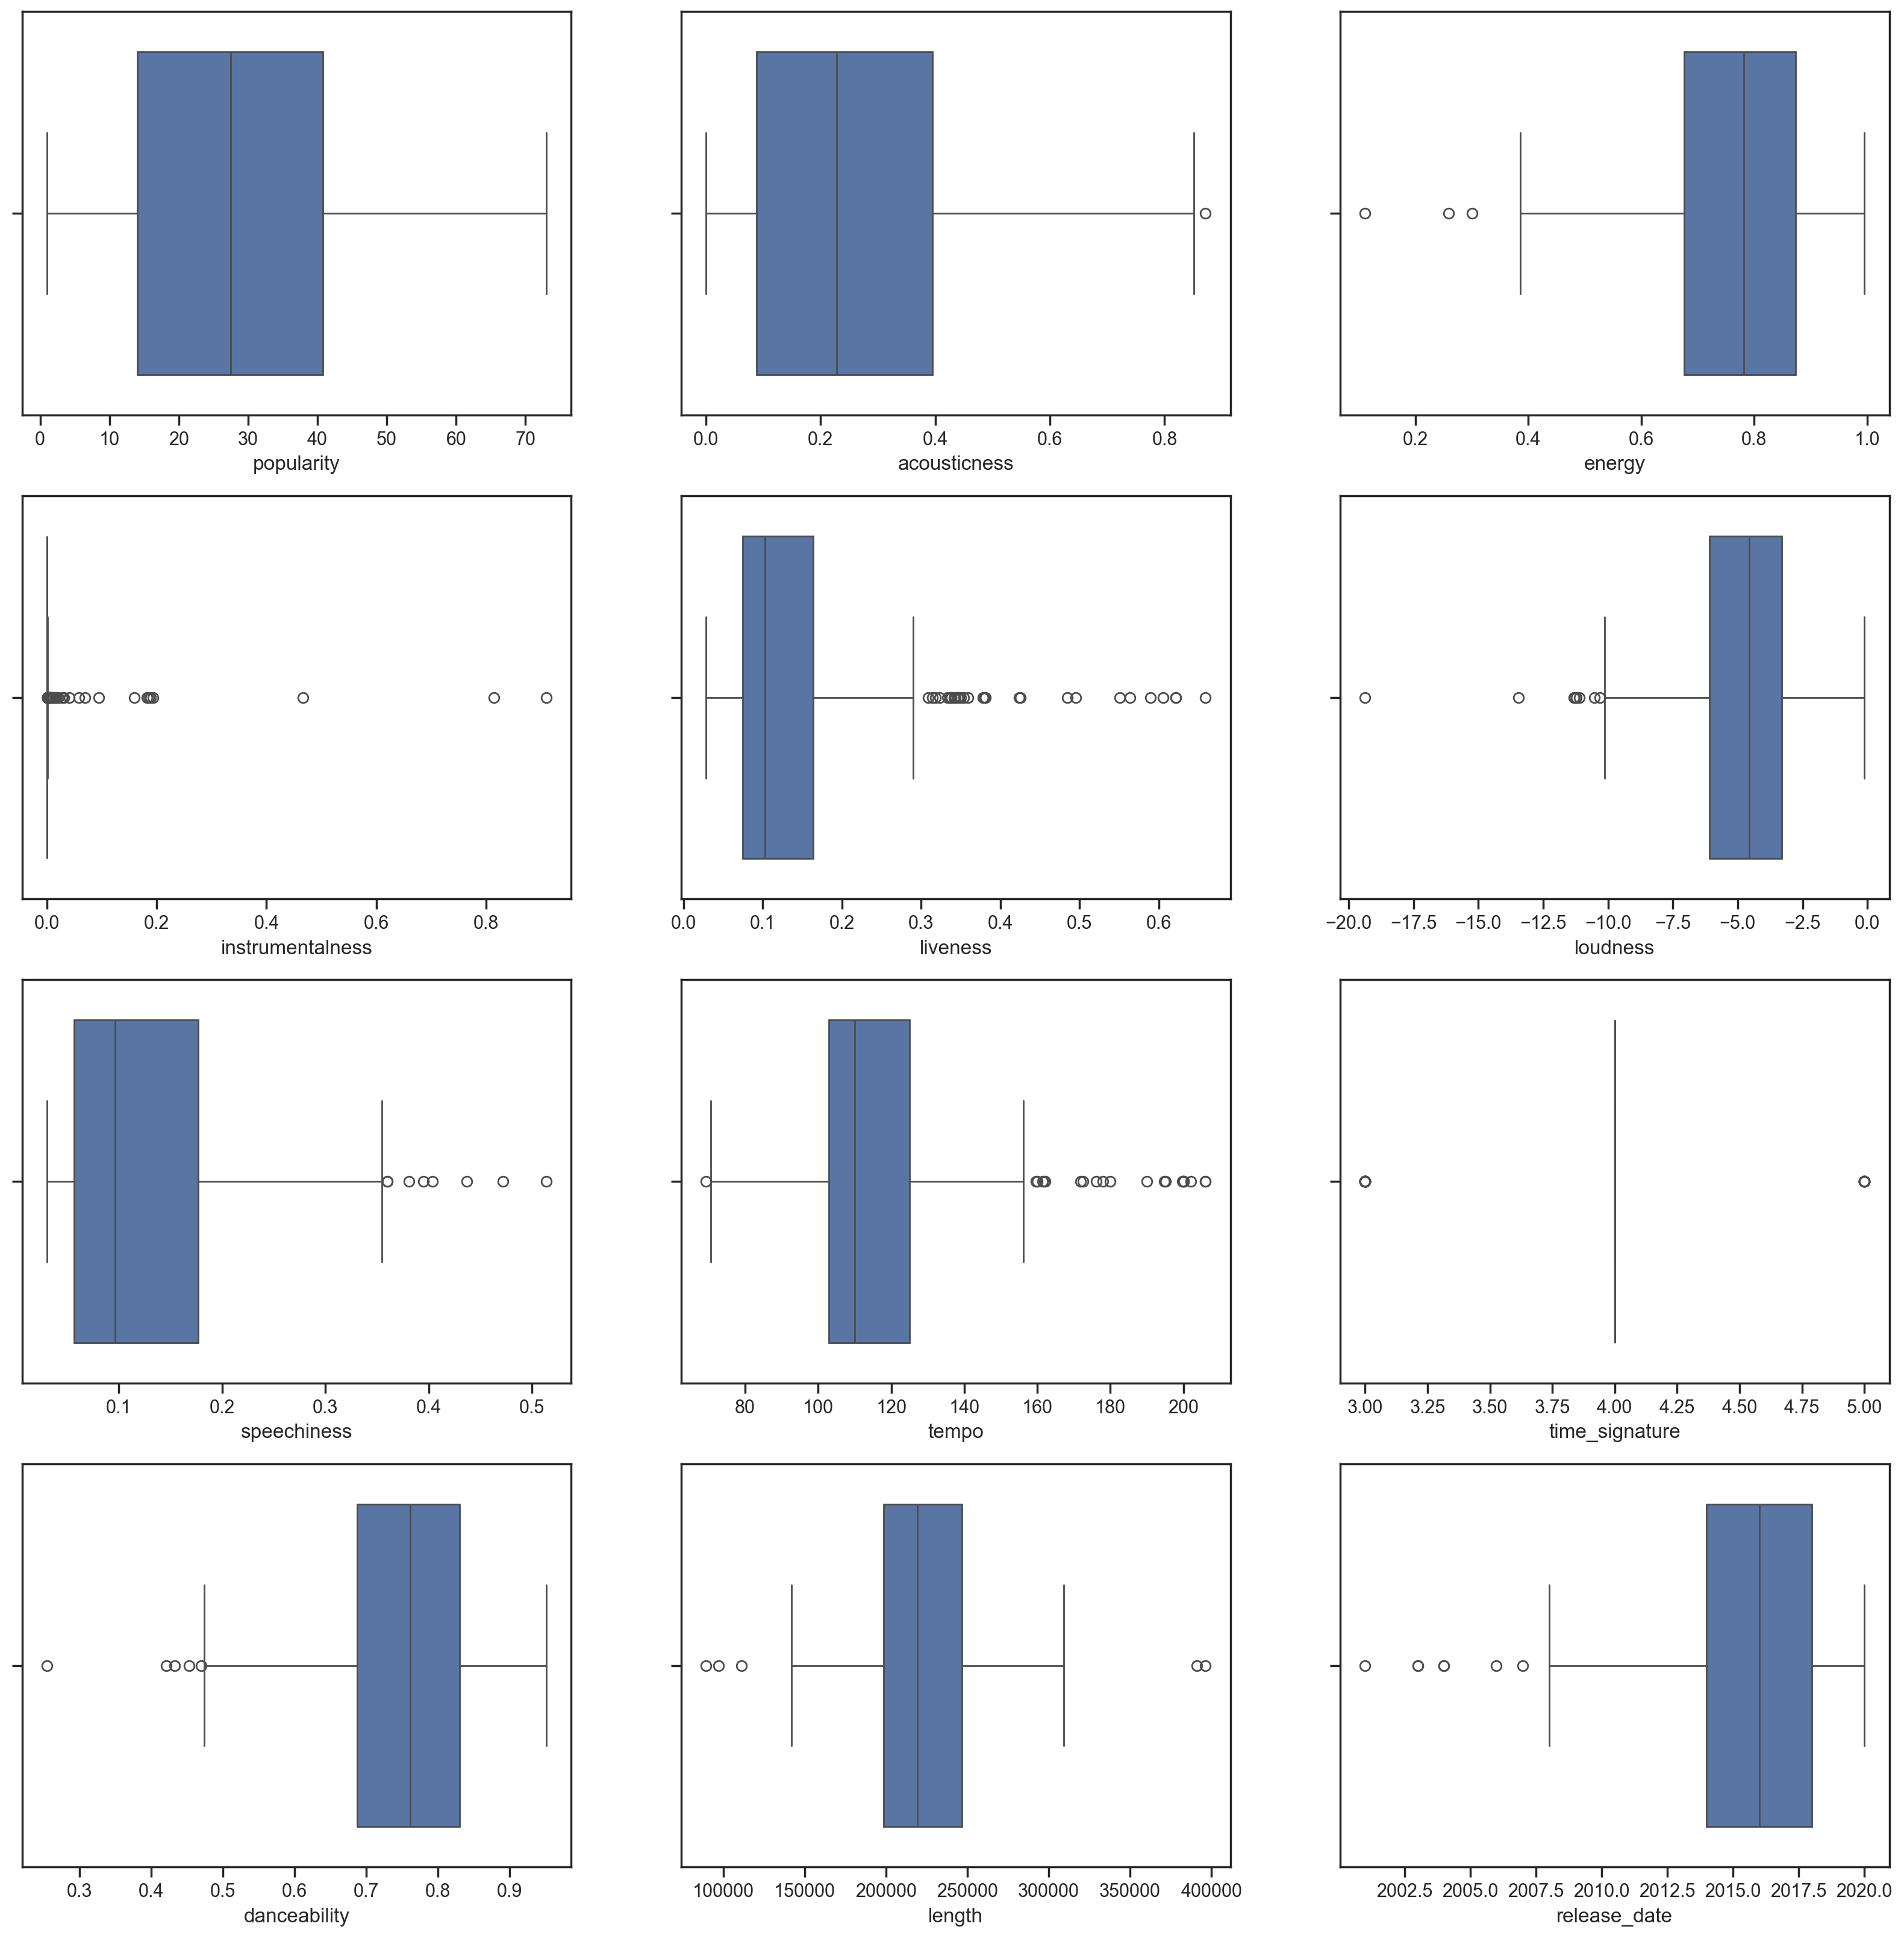

In [12]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

In [13]:
# Choose several columns with similar ranges. Make sure to include the artist_top_genre column to keep our genres straight.
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# X = scaler.fit_transform(X)

y = le.transform(y)

In [14]:
X

,artist_top_genre,popularity,danceability,acousticness,loudness,energy
1,1,30,0.710,0.0822,-5.640,0.683
3,2,14,0.894,0.7980,-4.961,0.611
4,1,25,0.702,0.1160,-6.044,0.833
5,2,26,0.803,0.1270,-10.034,0.525
6,2,29,0.818,0.4520,-9.840,0.587
...,...,...,...,...,...,...
514,0,20,0.838,0.0358,-3.723,0.931
515,0,14,0.786,0.1950,-4.232,0.806
519,1,2,0.879,0.2240,-4.602,0.916
522,0,26,0.863,0.0366,-3.130,0.896


In [15]:
# K-Means Clustering has the drawback of needing to tell it how many clusters to build. 
# We know there are three song types, so let's focus on 3.
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed,n_init='auto')
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)

## 5.2.1 Evaluation


Cluster quality metrics evaluated (see [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation) for definitions and discussions of the metrics):

| Shorthand | full name |
| ---- | ---- |
| homo | homogeneity score |
| compl | completeness score |
| v-meas | V measure |
| ARI | adjusted Rand index |
| AMI | adjusted mutual information |
| silhouette | silhouette coefficient |

**NOTE**: Homogeneity/Completeness score, V measure, ARI and AMI are all **external validity indices** - so called since they require labels (i.e., external information). 

Silhouette coefficient on the other hand only requires the data points and cluster assignments, and is an example of an **internal validity index**. Validity indices can be used to evaluate single clustering, choose k, or compare multiple clusterings. However, there are some nuances in the use of these measures and how they should be used with different clustering models, which goes beyond this course.

In [16]:
# The numbers above do not mean much to us, so let's get a 'silhouette score' to see the accuracy. 
# Our score is in the middle.
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [17]:
# Import KMeans and build a model
from sklearn.cluster import KMeans
wcss = []

# We'll try 10 clusters and see how the inertia changes.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

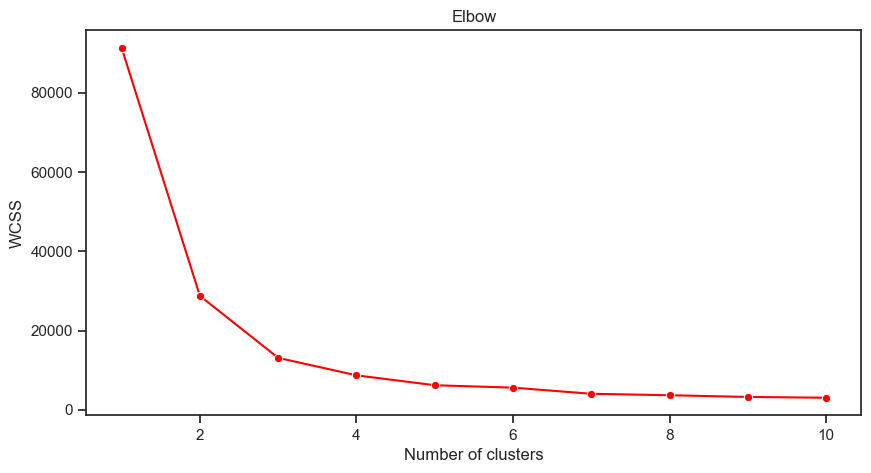

In [18]:
# Use that model to decide, using the Elbow Method, the best number of clusters to build
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looks like 3 is a good number after all. 

Fit the model again with `n_clusters=3` and create a scatterplot of your clusters. 

They do group in bunches, but they are pretty close together.

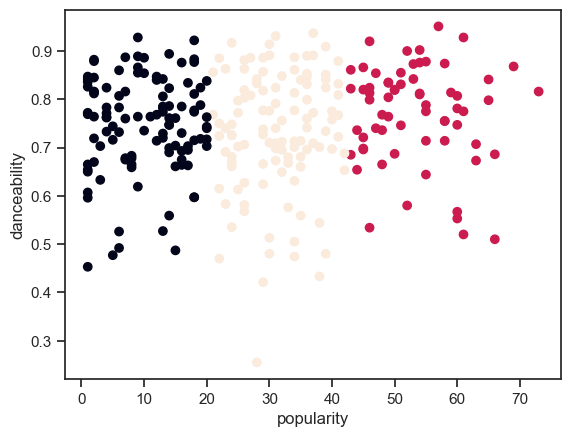

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, n_init='auto', init = 'k-means++')
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [20]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.3f}'. format(correct_labels/float(y.size)))

Result: 111 out of 286 samples were correctly labeled.
Accuracy score: 0.388


This model's accuracy is not bad, but not great. 

It may be that the data may not lend itself well to K-Means Clustering. You might try a different method.

# 5.3 👋 Experiments with PyCaret Clustering 

**Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ (*Prediction* ➡️ *Save Model*)

In [21]:
# check installed version
# if you have issues with .venv, try issuing in MLME-23 conda environment
# mamba install seaborn=0.12.2 scikit-learn=1.2.2 numpy=1.23.5 pycaret

import pycaret
pycaret.__version__

'3.1.0'

In [22]:
# Setup experiment with num_clusters as a variable
from pycaret.clustering import *
num_clusters = 3
myX = myDF.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]
myX['artist_top_genre'] = le.fit_transform(myX['artist_top_genre'])

mys = setup(myX, session_id = 456)

KeyboardInterrupt: 

In [ ]:
myX

,artist_top_genre,popularity,danceability,acousticness,loudness,energy
0,4,48,0.666,0.8510,-6.699,0.420
1,2,30,0.710,0.0822,-5.640,0.683
2,13,40,0.836,0.2720,-7.127,0.564
3,15,14,0.894,0.7980,-4.961,0.611
4,2,25,0.702,0.1160,-6.044,0.833
...,...,...,...,...,...,...
525,0,10,0.735,0.6320,-2.582,0.918
526,0,0,0.602,0.1770,-6.183,0.883
527,0,0,0.729,0.2380,-3.942,0.864
528,0,0,0.809,0.0490,-6.547,0.806


In [ ]:
all_metrics = get_metrics()
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x14d92d900>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x14d92dab0>,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x14d92db40>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x14d8eb0a0>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x14d8eaf80>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x14d8eb130>,make_scorer(completeness_score),pred,{},True,True,False


In [ ]:
# Compare experiments
mykmeans = create_model('kmeans', num_clusters=num_clusters)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5838,1420.8245,0.6170,0,0,0


In [ ]:
mykmeans_cluster = assign_model(mykmeans)
mykmeans_cluster.tail()

,artist_top_genre,popularity,danceability,acousticness,loudness,energy,Cluster
525,0,10,0.735,0.632,-2.582,0.918,Cluster 1
526,0,0,0.602,0.177,-6.183,0.883,Cluster 1
527,0,0,0.729,0.238,-3.942,0.864,Cluster 1
528,0,0,0.809,0.049,-6.547,0.806,Cluster 1
529,0,0,0.816,0.114,-2.204,0.961,Cluster 1


In [ ]:
evaluate_model(mykmeans)

In [ ]:
# convert X to a dataframe
mylabels=predict_model(mykmeans,data=mykmeans_cluster)


In [ ]:
mylabels

,artist_top_genre,popularity,danceability,acousticness,loudness,energy,Cluster
0,4.0,48.0,0.666,0.8510,-6.699,0.420,1
1,2.0,30.0,0.710,0.0822,-5.640,0.683,2
2,13.0,40.0,0.836,0.2720,-7.127,0.564,2
3,15.0,14.0,0.894,0.7980,-4.961,0.611,3
4,2.0,25.0,0.702,0.1160,-6.044,0.833,3
...,...,...,...,...,...,...,...
525,0.0,10.0,0.735,0.6320,-2.582,0.918,3
526,0.0,0.0,0.602,0.1770,-6.183,0.883,0
527,0.0,0.0,0.729,0.2380,-3.942,0.864,0
528,0.0,0.0,0.809,0.0490,-6.547,0.806,0


In [ ]:
# turn "Cluster n" to the number n
mylabels['Cluster'] = mylabels['Cluster'].str.replace('Cluster ','')
mylabels

,artist_top_genre,popularity,danceability,acousticness,loudness,energy,Cluster
0,4.0,48.0,0.666,0.8510,-6.699,0.420,1
1,2.0,30.0,0.710,0.0822,-5.640,0.683,2
2,13.0,40.0,0.836,0.2720,-7.127,0.564,2
3,15.0,14.0,0.894,0.7980,-4.961,0.611,3
4,2.0,25.0,0.702,0.1160,-6.044,0.833,3
...,...,...,...,...,...,...,...
525,0.0,10.0,0.735,0.6320,-2.582,0.918,3
526,0.0,0.0,0.602,0.1770,-6.183,0.883,0
527,0.0,0.0,0.729,0.2380,-3.942,0.864,0
528,0.0,0.0,0.809,0.0490,-6.547,0.806,0


In [ ]:
mylabels['artist_top_genre'].astype(int)

0       4
1       2
2      13
3      15
4       2
       ..
525     0
526     0
527     0
528     0
529     0
Name: artist_top_genre, Length: 477, dtype: int64

In [ ]:
correct_labels = sum(mylabels['artist_top_genre'].astype(int) == mylabels['Cluster'].astype(int))

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.3f}'. format(correct_labels/float(y.size)))


Result: 176 out of 286 samples were correctly labeled.
Accuracy score: 0.615


*Note: pycaret uses* `predict_model()` *for predictions with unseen data*. 

## 📄 In class exercise (15 minutes): 
Experiment different setups and data using pycaret clustering for better accuracy. 
A low-hanging fruit is a higher `n_clusters`.
Remember the pycaret clustering workflow and [cheat sheet](https://pycaret.gitbook.io/docs/learn-pycaret/cheat-sheet):


**Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ (*Prediction* ➡️ *Save Model*)

## 5.4 Principal Component Analysis (PCA)
You can think of Principal component analysis as finding a linear subspace of a given dimension (line, plane, hyperplane,...) that is the best fit of high-dimensional vectors. In this case, by best fit we mean that we minimize the squares of the distances of the vectors from the subspace, which corresponds to the information that we'll lose by this method.

If you recall how linear regression works, this may sound familiar. The difference is that linear regression studies functional dependence of the label on the features (how to fit a linear predictor), while PCA does not take the labels into account, it is only concerned about the features. The exact formulations are out of scope of this assignment but for visualizations, see for example [this link](https://www.r-bloggers.com/2010/09/principal-component-analysis-pca-vs-ordinary-least-squares-ols-a-visual-explanation/). 

There are a few pitfalls to PCA that you should be aware of:
* If we set the dimensions of the subspace too low, we may lose too much information to make any reasonable predictions.
* The features generated by PCA are a linear combination of the original features and there's likely no way to interpret them. Imagine a dataset where you try to predict car brand based on engine power and price. Using PCA to reduce the features to 1 might leave us with a feature "0.9\*price-0.1\*power", which doesn't have any real-world meaning. 
* Since PCA doesn't take labels into account, it is entirely possible that the selected features will not be optimal for predicting the labels.
* PCA is very sensitive to statistical properties of the different dimensions (=features).

All of these will be illustrated below.

### 5.4.1 MNIST
We begin by fetching the MNIST dataset. This dataset contains 70000 B&W images with resolution 28x28 pixels. Each pixel represents a shade of grey as an 8bit integer (range 0-255) and each image represents a handwritten digit. This leads to a 10-class classification problem, where the goal is to predict the digit based on pixel intensities.

Below we fetch the datset and view one representative of each class to familiarize ourselves with the dataset.

In [ ]:
# Import basic libraries needed for this assignment
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# load the MNIST dataset
X_MNIST, y_MNIST = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


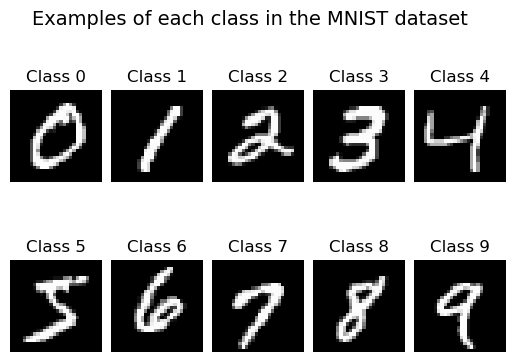

In [ ]:
# plot the numbers in two rows
def plot_digits(X,y,cols=5,title=None):
    cols = 5
    fig, axs = plt.subplots(2, cols)
    plt.axis('off')
    for digit in range(10):
        # find the first representative of the label
        idx = np.argwhere(y == str(digit))[0]

        # change the vector into a 2D array and plot it
        im = X[idx].reshape(28, 28)
        axs[digit//cols, digit % cols].set_title(f'Class {digit}')
        axs[digit//cols, digit % cols].imshow(im, cmap='gray')
        axs[digit//cols, digit % cols].axis('off')

    # change the spacing between the subplots
    plt.subplots_adjust(wspace=0.1, hspace=-0.3)
    if title is not None:
        fig.suptitle(title,fontsize=14)
        fig.subplots_adjust(top=0.97)
    
plot_digits(X_MNIST,y_MNIST,title="Examples of each class in the MNIST dataset")
plt.show()


### 5.4.2 Demo: PCA, before and after
Below, we use Logistic Regression like we're used to, to predict the digits. Even though the images have a rather low resolution, training the model on more than a couple hundred images quickly becomes very computationally demanding. Performing a grid search to find the optimal parameters could thus easily take over an hour.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_MNIST, y_MNIST, test_size=0.33, random_state=42)

clf = LogisticRegression(solver='liblinear' )
clf.fit(X_train[:200], y_train[:200])
# can increase training data to reach 91.7 % but it takes 10 minutes on my computer


LogisticRegression(solver='liblinear')

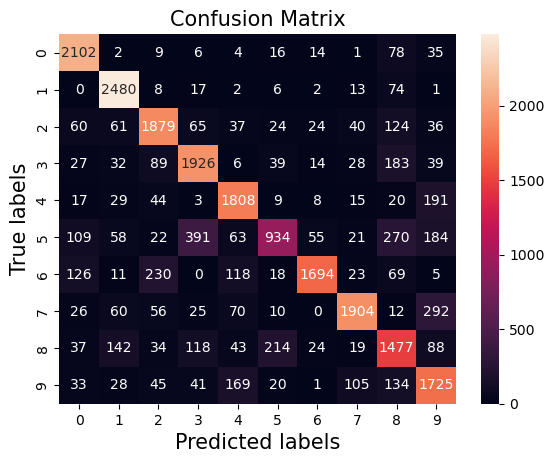

Prediction accuracy: 77.61%


In [ ]:
def generate_confusion_matrix(y_true, y_pred):
    # visualize the confusion matrix
    ax = plt.subplot()
    c_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(c_mat, annot=True, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title('Confusion Matrix', fontsize=15)

y_pred = clf.predict(X_val)
generate_confusion_matrix(y_val, y_pred)
plt.show()

# compute the accuracy
multi_accuracy = accuracy_score(y_val, y_pred)
print(f"Prediction accuracy: {100*multi_accuracy:.2f}%")


#### 5.4.2.1 With PCA
First, we fit the PCA to the training data. By setting the ``n_components`` parameter, we can choose the dimension of the fitted subspace (=number of output features). A perhaps surprising result is that having computed the PCA, it is very simple to lower the amount of features further: the most important feature (in the PCA sense) is the first one, the most important two are the first two,... 

One way to decide how many components to use is to look at the explained variance ratio of each of the features. These correspond to the "importance" of each feature. Let's plot these:

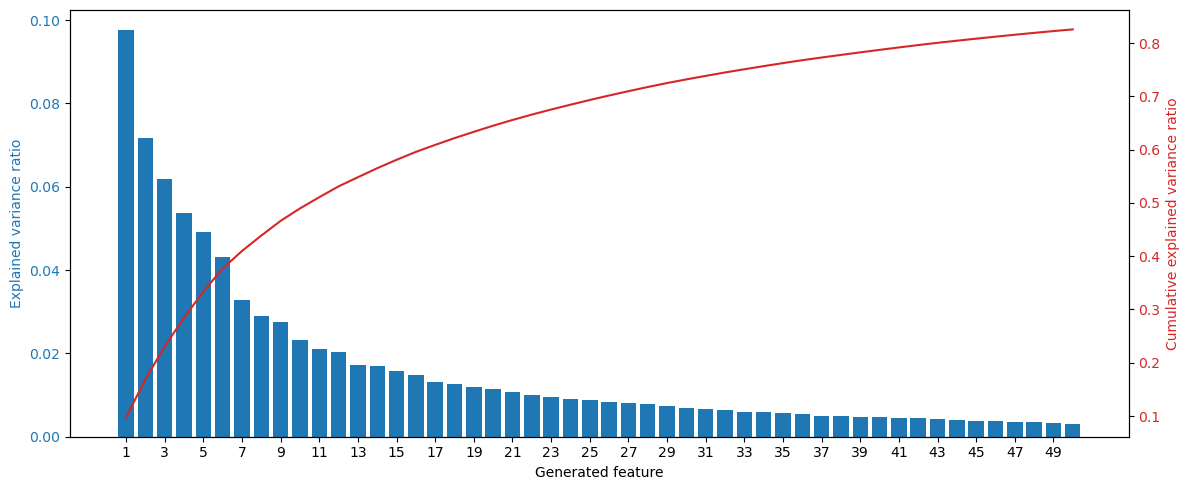

In [ ]:
# fit the PCA
N = 50
pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(X_train)

# plot the explained variances
fig, ax1 = plt.subplots(figsize=(12, 5))
color = 'tab:blue'
ax1.bar(1+np.arange(N), pca.explained_variance_ratio_, color=color)
ax1.set_xticks(1+np.arange(N, step=2))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("Explained variance ratio", color=color)
ax1.set_xlabel("Generated feature")

ax2 = ax1.twinx()
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), color=color)
ax2.set_ylabel("Cumulative explained variance ratio", color=color)
fig.tight_layout()
plt.show()


If we choose to use 784 components, then the cumulative explained variance ratio will be 1, i.e., no data would be lost. This corresponds to projecting the data to the same space where it originally "lived", i.e. not doing anything. Note, however, that the features will likely still change, even though no data is lost. What happens is essentially a change of basis of the feature space. 

Of course, there's not much use in keeping all the features, so how many features (components) should we keep? There's no clear cut answer to that here and there rarely is. In this case, let's keep 15 components, because the explained variance ratio drops to under 2% per feature around that point. 

In [ ]:
N = 15
pca.set_params(n_components=N)
X_train_reduced = pca.fit_transform(X_train)

Now let's visually confirm that the compression hasn't affected the pictures too much. Based on the representatives chosen, it seems that keeping just 15/784 dimensions still leaves the digits legible, if slightly blurry.

To view the image after dropping the less important features, we need to transform the 15-dimensional vector back into the original 784-dimensional space. For this, we'll use the ``inverse_transform`` method. Mathematically, all of the components form a basis of the original space, so this function creates a linear combination of the first 15 basis vector with coefficients corresponding to the new features.

Let's use the transformed data ``X_train_reduced`` to train a logistic regressor. Then we compute its accuracy on the validation set. 

Prediction accuracy: 82.59%


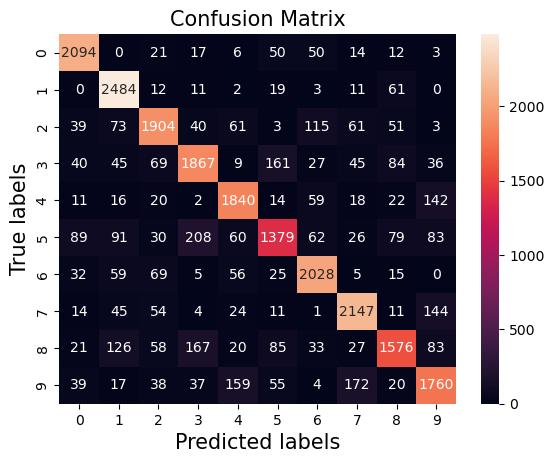

In [ ]:
clf_2 = LogisticRegression(solver='sag') # create the object, SET solver='sag'
clf_2.fit(X_train_reduced, y_train) # fit the data
y_pred = clf_2.predict(pca.transform(X_val))# compute the prediction on the validating set
multi_accuracy = accuracy_score(y_val, y_pred) # compute the accuracy score

print(f"Prediction accuracy: {100*multi_accuracy:.2f}%")
generate_confusion_matrix(y_val, y_pred)

plt.show()

### 5.4.3 Demo: Data visualization
Another application of PCA is visualization of high-dimensional data. Here, we plot each image as a single point based on its coordinates in the 2D subspace generated by PCA. For example, we can see that 1's seem to be very easy to tell apart and they all look very similar, whereas these two dimensions are certainly not enough to tell apart 4's and 9's in any meaningful way. This confirms what we saw earlier - with only a few components, the 4 looked like a 9!

Note that since the features carry no meaning anymore, we label the axes simply as PCA1 and PCA2.

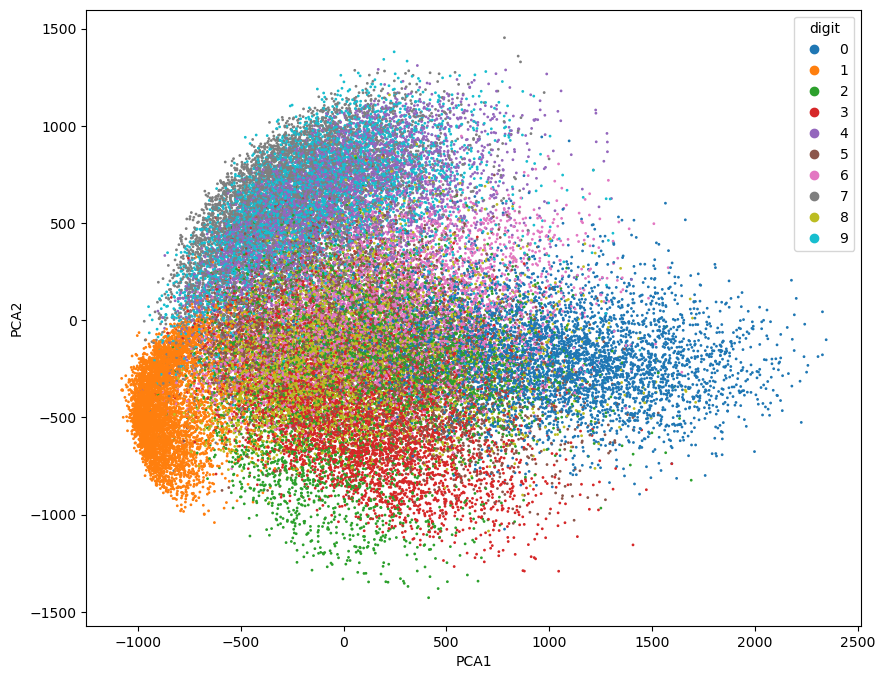

In [ ]:
plt.figure(figsize=(10, 8))
# convert the labels to numbers, each will be assigned a separate color based on the cmap specified
colors = [int(x) for x in y_train]
sc = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], s=1, c=colors, cmap='tab10')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(*sc.legend_elements(), title='digit')
plt.show()


# Assignment 4: Experiments with tsne

## Steps to follow

The purpose of this lesson was to introduce you to K-Means clustering. There are times when K-Means is not appropriate for your data. Show that clustering using t-sne may work better. Note that t-sne is not exactly a clustering algorithm, but can be used to visualize high dimensional data. Following are links that may be helpful to you in documenting and explaining your findings.

- [How to use t-sne effectively](https://distill.pub/2016/misread-tsne/) 

- [t-sne tutorial](https://github.com/oreillymedia/t-SNE-tutorial) 

- [a very simple example of using t-sne with scikit](https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html)

## An example of how to document your work
I found that t-sne was able to "cluster" the genres fairly well. The clusters tended to be fairly tight, and most of the styes in a cluster were of the same genre. There were some clusters that were less well defined, however. For example, ... Overall, I found t-sne to be a fairly effective "clustering" algorithm for this dataset.



## Synthetic example from scikit doc
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE 

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X)
X_embedded

array([[  1.6815251,  32.90598  ],
       [ 88.095924 ,  25.850674 ],
       [ 81.86445  , -60.691193 ],
       [ -4.417122 , -53.739376 ]], dtype=float32)

## t-SNE: The effect of various perplexity values on the shape
After https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

For further details, “How to Use t-SNE Effectively” https://distill.pub/2016/misread-tsne/ provides a good discussion of the effects of various parameters, as well as interactive plots to explore those effects.

t-SNE is flexible, but tricky to interpret.

In [ ]:
# YOUR CODE HERE

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=3,
    init="random",
    random_state=20150101,
    perplexity=30,
    learning_rate="auto",
    n_iter=300,
)

digits = load_digits()
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

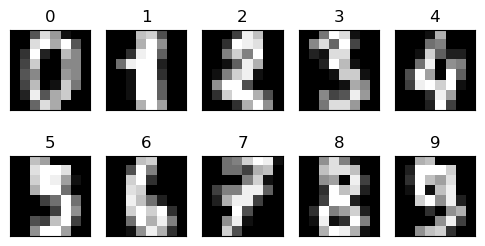

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.savefig('digits-generated.png', dpi=150)

In [ ]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [ ]:
digits_proj = tsne.fit_transform(X)

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int_)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext, ztext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

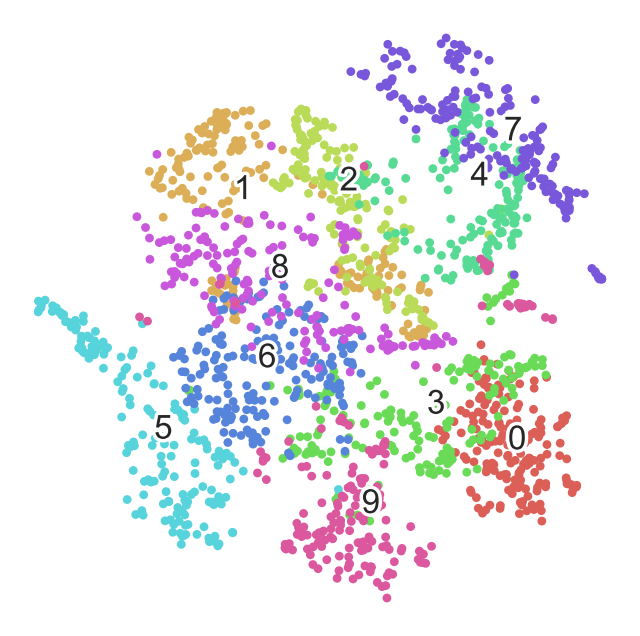

In [ ]:
scatter(digits_proj, y)
plt.savefig('digits_tsne-generated.png', dpi=120)